<center> <h1>  Sentiment Analysis System </h1> </center>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Sentiment Analysis System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        positive         
        neutral          
        very negative    
        very positive     
        negative          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="stepbystep"></a>
# Step by step Implementation:

<a id="step-1"></a>
## Import the required libraries

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

# Read & Understand Data

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

### Read Dataset

In [2]:
''' 
    /*-------------------- LOAD_TRAINING_DATA ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
training_data = pd.read_csv('dataset.csv')
training_data = pd.DataFrame(training_data)
#Load the Training Data

print(" Data:")
print("=============\n")
training_data.head()

 Data:



,Unnamed: 0,title,author,content,tags
0,0,Do not go gentle into that good night,Dylan Thomas,"Do not go gentle into that good night,\nOld ag...",[]
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,How do I love thee? Let me count the ways.\nI ...,[]
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,Shall I compare thee to a summer’s day?\nThou ...,[]
3,3,If—,Rudyard Kipling,If you can keep your head when all about you\n...,[]
4,4,Nothing Gold Can Stay,Robert Frost,"Nature’s first green is gold,\nHer hardest hue...",[]


In [3]:
training_data = training_data.dropna()

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # Regular expression matches any string that starts with $
    text = re.sub(r'\$\w+\s*', '', text)

    # Regular expression matches any string that starts with Contract: 0x (Contract: 0x) 
    text = re.sub(r'Contract: 0x\w+\s*', '', text)

    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()

    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


### Text Preprocessing of  Data

In [6]:
# Apply the Preprocessing on Input Data Comments of Training Data
training_data['content'] = training_data['content'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
training_data.head(5)


Training Data After Pre-processing:



,Unnamed: 0,title,author,content,tags
0,0,Do not go gentle into that good night,Dylan Thomas,go gentle good night old age burn rave close d...,[]
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,love thee let count ways love thee depth bread...,[]
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall compare thee summer day thou art lovely ...,[]
3,3,If—,Rudyard Kipling,keep head losing blaming trust men doubt make ...,[]
4,4,Nothing Gold Can Stay,Robert Frost,nature first green gold hardest hue hold early...,[]


# Emotion Data Labeling using NRC-Emotion-Lexicon

In [7]:
# import of package
import nltk

from nltk.corpus import stopwords

In [8]:
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'association'])
nrc_lexicon

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141535,zoom,negative,0
141536,zoom,positive,0
141537,zoom,sadness,0
141538,zoom,surprise,0


In [9]:
import pandas as pd

emotion_lexicon_path = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
# Load the NRC Emotion Lexicon into a dictionary
nrc_lexicon = {}
with open(emotion_lexicon_path, 'r') as file:
    for line in file:
        word, emotion, value = line.strip().split('\t')
        if word not in nrc_lexicon:
            nrc_lexicon[word] = {emotion: int(value)}
        else:
            nrc_lexicon[word][emotion] = int(value)



In [10]:
# Function to get the dominant emotion for a given text
def get_dominant_emotion(text):
    # Define the emotions to consider (excluding positive and negative)
    emotions_to_consider = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    
    emotions = {emotion: 0 for emotion in emotions_to_consider}

    for word in text.split():
        if word in nrc_lexicon:
            for emotion, value in nrc_lexicon[word].items():
                if emotion in emotions_to_consider:
                    emotions[emotion] += value

    # Determine the dominant emotion
    dominant_emotion = max(emotions, key=emotions.get)

    return dominant_emotion

# Apply the get_dominant_emotion function to label the DataFrame
training_data['Dominant_Emotion'] = training_data['content'].apply(get_dominant_emotion)


In [11]:
training_data

,Unnamed: 0,title,author,content,tags,Dominant_Emotion
0,0,Do not go gentle into that good night,Dylan Thomas,go gentle good night old age burn rave close d...,[],anger
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,love thee let count ways love thee depth bread...,[],joy
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall compare thee summer day thou art lovely ...,[],anticipation
3,3,If—,Rudyard Kipling,keep head losing blaming trust men doubt make ...,[],anger
4,4,Nothing Gold Can Stay,Robert Frost,nature first green gold hardest hue hold early...,[],joy
...,...,...,...,...,...,...
38675,26812,Fairyland,Edgar Allan Poe,dim valesand shadowy floods cloudylooking wood...,[],anticipation
38676,26813,The Happiest Day,Edgar Allan Poe,happiest daythe happiest hour seared blighted ...,[],joy
38677,26814,Hymn To Aristogeiton And Harmodius,Edgar Allan Poe,wreathed myrtle sword ill conceal like champio...,[],fear
38678,26815,In Youth I Have Known One,Edgar Allan Poe,often forget time lone admiring natures univer...,[],joy


In [12]:
# emotion_lexicon_path = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

# # Load NRC Emotion Lexicon into a dictionary
# emotion_lexicon = {}
# with open(emotion_lexicon_path, 'r') as file:
#     for line in file:
#         word, emotion, value = line.strip().split()
#         if word in emotion_lexicon:
#             emotion_lexicon[word][emotion] = int(value)
#         else:
#             emotion_lexicon[word] = {emotion: int(value)}
            
# from nltk.tokenize import word_tokenize
# data = training_data['content']
# def get_emotion_scores(text):
#     tokens = word_tokenize(text.lower())
#     emotion_scores = {'positive': 0, 'negative': 0}

#     for token in tokens:
#         if token in emotion_lexicon:
#             for emotion, value in emotion_lexicon[token].items():
#                 # Check if the emotion exists in the dictionary before accessing it
#                 if emotion in emotion_scores:
#                     emotion_scores[emotion] += value

#     return emotion_scores

# # Apply the function to each poem in your dataset
# training_data['sentiment'] = data.apply(get_emotion_scores)

# # Define a function to determine Positive/Negative label
# def label_poem(emotion_scores):
#     if emotion_scores['positive'] >= emotion_scores['negative']:
#         return 'Positive'
#     else:
#         return 'Negative'

# # Apply the function to each row in the dataset
# training_data['sentiment'] = training_data['sentiment'].apply(label_poem)


Number of instances and Classes in  Dataset:



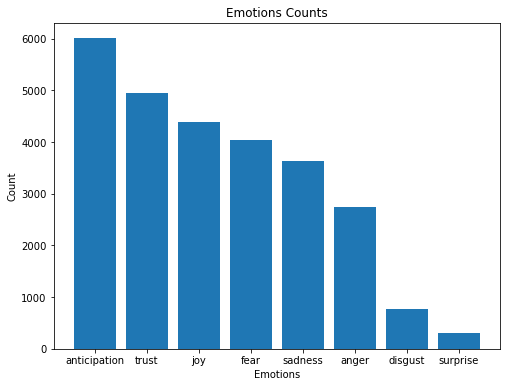

In [13]:
print("\nNumber of instances and Classes in  Dataset:")
print("======================================================\n")
# Set the figure size
# Set the figure size
plt.figure(figsize=(8, 6))

# Count the occurrences of each sentiment in the 'Sentiment' column
sentiment_counts = training_data['Dominant_Emotion'].value_counts()


# Create a bar graph with colorful bars
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and a title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Emotions Counts')

# Show the colorful bar graph
plt.show()

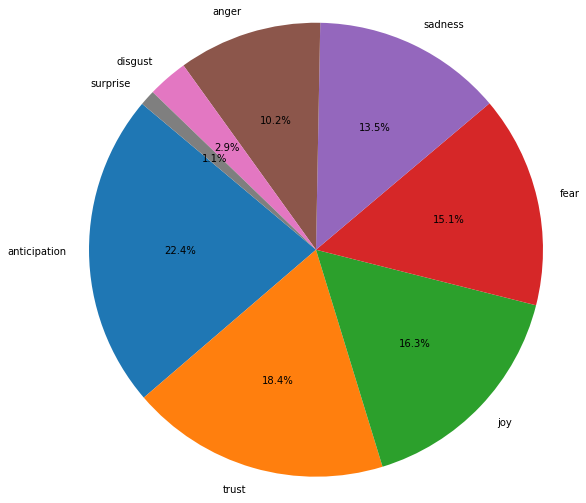

In [14]:
# Calculate the class distribution
sentiment_counts = training_data['Dominant_Emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# Sentiment Data Labeling using VADER Sentiment Analyzer

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to assign sentiment labels
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    else:
        return 'negative'

# Apply VADER sentiment analysis and add labels to the DataFrame
training_data['Polarity'] = training_data['content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
training_data['Sentiment'] = training_data['Polarity'].apply(get_sentiment_label)


Number of instances and Classes in Training Dataset:



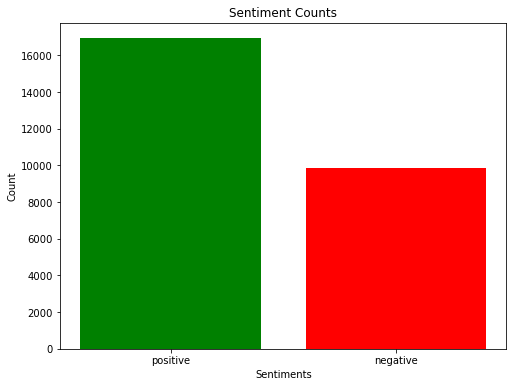

In [16]:
print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")
# Set the figure size
# Set the figure size
plt.figure(figsize=(8, 6))

# Count the occurrences of each sentiment in the 'Sentiment' column
sentiment_counts = training_data['Sentiment'].value_counts()

# Define colors for each sentiment
colors = ['green', 'red']

# Create a bar graph with colorful bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the colorful bar graph
plt.show()

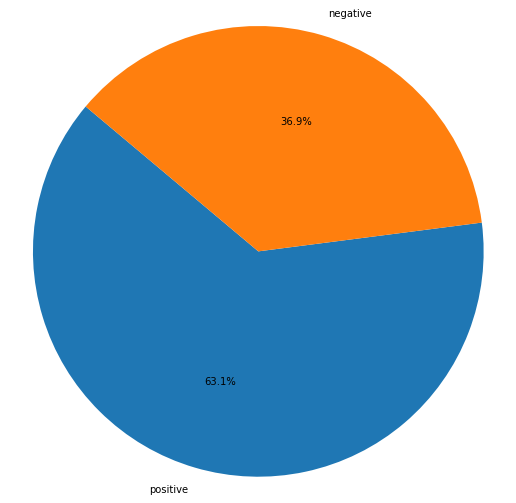

In [17]:
# Calculate the class distribution
sentiment_counts = training_data['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [18]:
training_data

,Unnamed: 0,title,author,content,tags,Dominant_Emotion,Polarity,Sentiment
0,0,Do not go gentle into that good night,Dylan Thomas,go gentle good night old age burn rave close d...,[],anger,-0.9423,negative
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,love thee let count ways love thee depth bread...,[],joy,0.9961,positive
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall compare thee summer day thou art lovely ...,[],anticipation,0.8885,positive
3,3,If—,Rudyard Kipling,keep head losing blaming trust men doubt make ...,[],anger,-0.9506,negative
4,4,Nothing Gold Can Stay,Robert Frost,nature first green gold hardest hue hold early...,[],joy,-0.4939,negative
...,...,...,...,...,...,...,...,...
38675,26812,Fairyland,Edgar Allan Poe,dim valesand shadowy floods cloudylooking wood...,[],anticipation,0.9400,positive
38676,26813,The Happiest Day,Edgar Allan Poe,happiest daythe happiest hour seared blighted ...,[],joy,0.9917,positive
38677,26814,Hymn To Aristogeiton And Harmodius,Edgar Allan Poe,wreathed myrtle sword ill conceal like champio...,[],fear,0.9810,positive
38678,26815,In Youth I Have Known One,Edgar Allan Poe,often forget time lone admiring natures univer...,[],joy,0.9792,positive


In [19]:
training_data.to_csv('poem_dataset_updated.csv', index=False)

### Understand Training Data

In [20]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(training_data.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_training_data_instances= len(training_data.index)
print("Total Train Data instances:",total_training_data_instances)



Attributes Names in Train Dataset:

Index(['Unnamed: 0', 'title', 'author', 'content', 'tags', 'Dominant_Emotion',
       'Polarity', 'Sentiment'],
      dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 26811


In [21]:
training_data.describe()

,Polarity
count,26811.000000
mean,0.256176
std,0.718577
min,-1.000000
25%,-0.458800
50%,0.551300
75%,0.921250
max,1.000000


In [22]:
training_data.Sentiment.value_counts()

positive    16931
negative     9880
Name: Sentiment, dtype: int64

In [23]:
training_data.Dominant_Emotion.value_counts()

anticipation    6007
trust           4945
joy             4377
fear            4046
sadness         3632
anger           2741
disgust          767
surprise         296
Name: Dominant_Emotion, dtype: int64

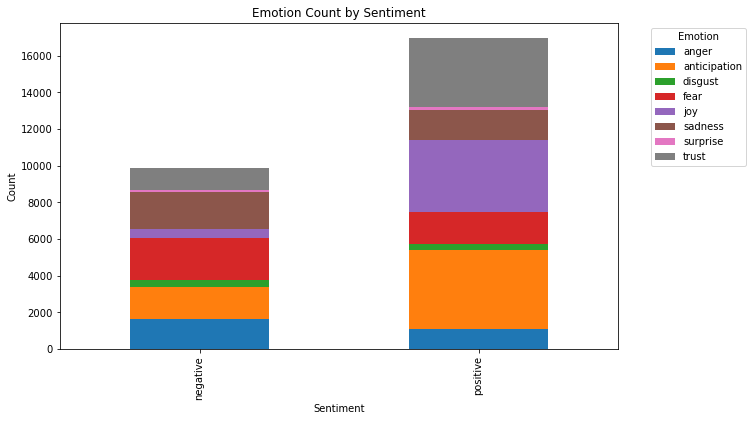

In [24]:
# Grouping by Sentiment and Dominant_Emotion, and getting the count
grouped_data = training_data.groupby(['Sentiment', 'Dominant_Emotion']).size().reset_index(name='Count')

# Pivoting the DataFrame to have Sentiment as index, Dominant_Emotion as columns, and Count as values
pivot_data = grouped_data.pivot(index='Sentiment', columns='Dominant_Emotion', values='Count').fillna(0)

# Plotting a bar graph
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_title('Emotion Count by Sentiment')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

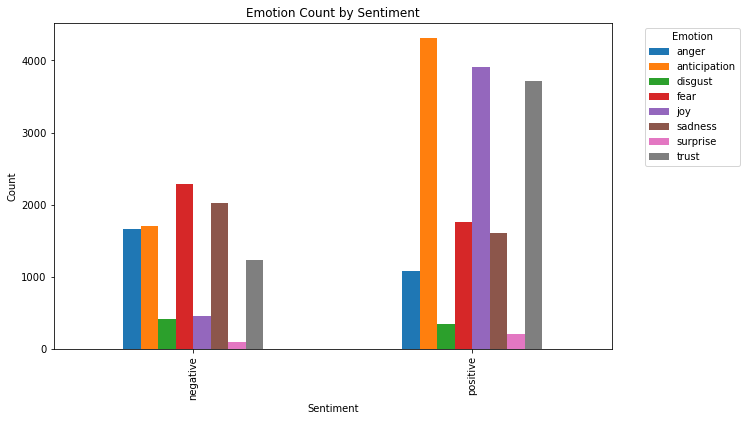

In [25]:
# Grouping by Sentiment and Dominant_Emotion, and getting the count
grouped_data = training_data.groupby(['Sentiment', 'Dominant_Emotion']).size().reset_index(name='Count')

# Pivoting the DataFrame to have Sentiment as index, Dominant_Emotion as columns, and Count as values
pivot_data = grouped_data.pivot(index='Sentiment', columns='Dominant_Emotion', values='Count').fillna(0)

# Plotting a bar graph with separate bars for each emotion
ax = pivot_data.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_title('Emotion Count by Sentiment')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [26]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_training_data = training_data
Tokens = preprocessed_training_data['content'].apply(word_tokenize)
Tokens = Tokens.to_frame()
Tokens['Token_Length'] = preprocessed_training_data['content'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



,content,Token_Length
0,"[go, gentle, good, night, old, age, burn, rave...","[2, 6, 4, 5, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, ..."
1,"[love, thee, let, count, ways, love, thee, dep...","[4, 4, 3, 5, 4, 4, 4, 5, 7, 6, 4, 5, 7, 5, 4, ..."
2,"[shall, compare, thee, summer, day, thou, art,...","[5, 7, 4, 6, 3, 4, 3, 6, 9, 5, 5, 5, 7, 4, 3, ..."


### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [27]:
preprocessed_training_data['content length'] = preprocessed_training_data['content'].astype(str).apply(len)
preprocessed_training_data['word_count'] = preprocessed_training_data['content'].apply(lambda x: len(str(x).split()))
preprocessed_training_data.head(3)

,Unnamed: 0,title,author,content,tags,Dominant_Emotion,Polarity,Sentiment,content length,word_count
0,0,Do not go gentle into that good night,Dylan Thomas,go gentle good night old age burn rave close d...,[],anger,-0.9423,negative,509,92
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,love thee let count ways love thee depth bread...,[],joy,0.9961,positive,380,66
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall compare thee summer day thou art lovely ...,[],anticipation,0.8885,positive,436,71


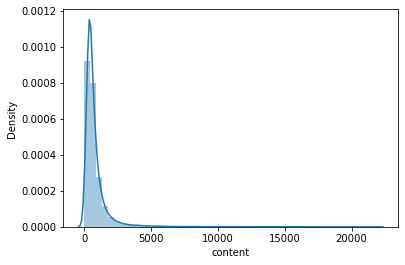

In [28]:
import seaborn as sns
text_length=preprocessed_training_data['content'].str.len()
sns.distplot(text_length)
plt.show()

In [29]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

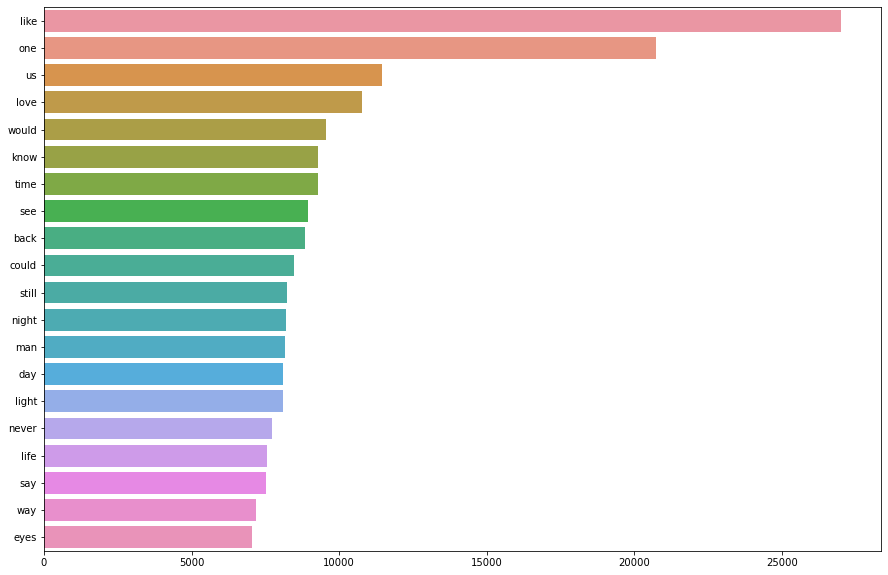

In [30]:
plot_top_non_stopwords_barchart(preprocessed_training_data['content'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Training Data

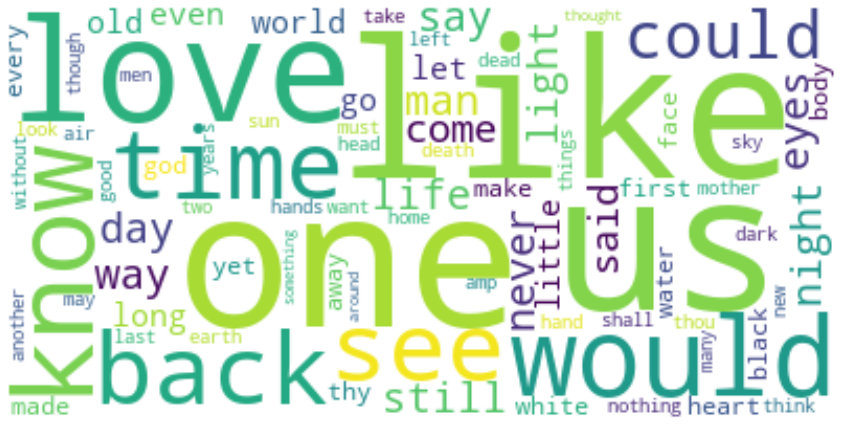

In [31]:
from wordcloud import WordCloud
text = ' '.join(preprocessed_training_data['content'])

# Calculate word frequency, count each word only once
word_freq = preprocessed_training_data['content'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, contour_width=3, background_color='white').generate_from_frequencies(word_freq)


plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [32]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_training_data['content'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

,Word,count
0,like,27004
1,one,20721
2,us,11444
3,love,10769
4,would,9569
5,know,9274
6,time,9271
7,see,8944
8,back,8851
9,could,8473


Here is the bar plot of the frequency of the top 20 words:

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

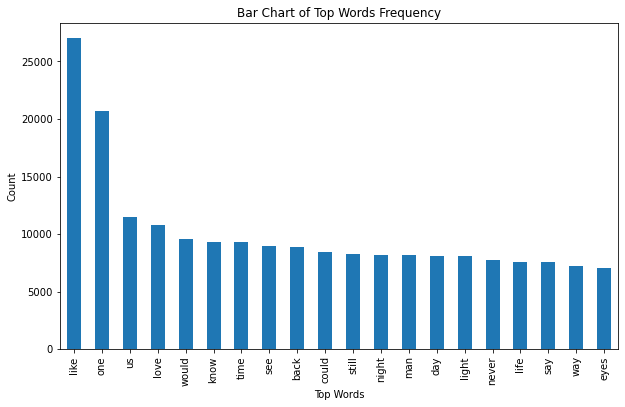

In [33]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_training_data['content'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

,Text,Count
0,let us,618
1,one day,607
2,listen audio,461
3,thou art,460
4,click icon,460
5,icon listen,460
6,audio poem,460
7,come back,453
8,one one,448
9,years ago,441


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

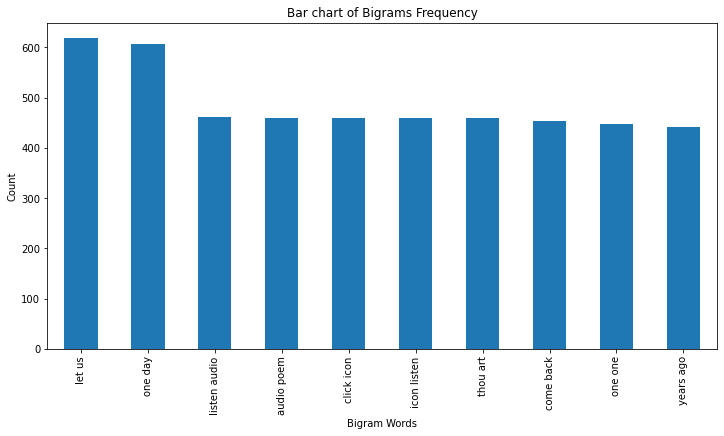

In [35]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

# Method 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [36]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 3000) # Extract 5000 Features 
train_text = preprocessed_training_data['content']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


## Convert Input of Training Data into Feature Vectors

In [37]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,abandoned,able,absence,absent,absolute,accept,according,ache,across,act,...,yet,yield,yon,york,youll,young,younger,youre,youth,youve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [38]:
training_data

,Unnamed: 0,title,author,content,tags,Dominant_Emotion,Polarity,Sentiment,content length,word_count
0,0,Do not go gentle into that good night,Dylan Thomas,go gentle good night old age burn rave close d...,[],anger,-0.9423,negative,509,92
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,love thee let count ways love thee depth bread...,[],joy,0.9961,positive,380,66
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall compare thee summer day thou art lovely ...,[],anticipation,0.8885,positive,436,71
3,3,If—,Rudyard Kipling,keep head losing blaming trust men doubt make ...,[],anger,-0.9506,negative,707,116
4,4,Nothing Gold Can Stay,Robert Frost,nature first green gold hardest hue hold early...,[],joy,-0.4939,negative,130,23
...,...,...,...,...,...,...,...,...,...,...
38675,26812,Fairyland,Edgar Allan Poe,dim valesand shadowy floods cloudylooking wood...,[],anticipation,0.9400,positive,747,106
38676,26813,The Happiest Day,Edgar Allan Poe,happiest daythe happiest hour seared blighted ...,[],joy,0.9917,positive,477,75
38677,26814,Hymn To Aristogeiton And Harmodius,Edgar Allan Poe,wreathed myrtle sword ill conceal like champio...,[],fear,0.9810,positive,419,61
38678,26815,In Youth I Have Known One,Edgar Allan Poe,often forget time lone admiring natures univer...,[],joy,0.9792,positive,981,148


In [39]:
''' 
    /*------------- SPLITTING_TRAINING_DATA_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame
# Extracting 'Sentiment' and 'Dominant_Emotion' and storing in a new DataFrame
training_data_output = training_data[['Sentiment', 'Dominant_Emotion']]

# Using LabelEncoder for 'Sentiment' and 'Dominant_Emotion' columns
label_encoder_sentiment = LabelEncoder()
label_encoder_emotion = LabelEncoder()
training_data_output['Sentiment'] = label_encoder_sentiment.fit_transform(training_data_output['Sentiment'])
training_data_output['Dominant_Emotion'] = label_encoder_emotion.fit_transform(training_data_output['Dominant_Emotion'])

# Displaying the new DataFrame with label-encoded columns
training_data_output

,Sentiment,Dominant_Emotion
0,0,0
1,1,4
2,1,1
3,0,0
4,0,4
...,...,...
38675,1,1
38676,1,4
38677,1,3
38678,1,4


In [40]:
training_data_output.reset_index(drop=True)

,Sentiment,Dominant_Emotion
0,0,0
1,1,4
2,1,1
3,0,0
4,0,4
...,...,...
26806,1,1
26807,1,4
26808,1,3
26809,1,4


In [41]:
input_training_features

,abandoned,able,absence,absent,absolute,accept,according,ache,across,act,...,yet,yield,yon,york,youll,young,younger,youre,youth,youve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26809,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = training_data_output

X_train, X_test, Y_train, Y_test =train_test_split(X, y, test_size=0.2, random_state=132)

# Train Machine Learning Models using Training Data

## MultiOutput Classifier

In [43]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
model = MultiOutputClassifier(MultinomialNB()).fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [44]:
Y_pred

array([[0, 0],
       [1, 4],
       [0, 3],
       ...,
       [0, 1],
       [0, 5],
       [1, 0]])

In [45]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    recall_score,
    precision_score,
)

# Evaluation of the Model

Accuracy for Sentiment: 0.707812791348126
F1 score for Sentiment: 0.7125670846861902
Recall for Sentiment: 0.6828978622327792
Precision for Sentiment: 0.8217220435869954
------------------------------------------------------------------------------------


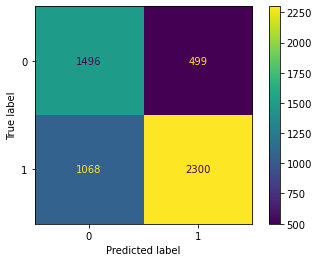

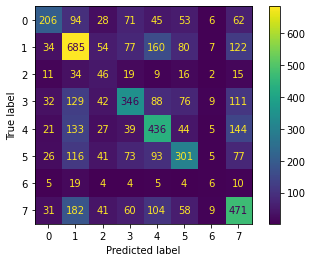

In [46]:
#accuracy, f1_score, and confusion matrix for is_depression
accuracy_l1 = accuracy_score(Y_test['Sentiment'], Y_pred[:,0])
F1_l1 = f1_score(Y_test['Sentiment'], Y_pred[:,0], average="weighted")
rec_l1 = recall_score(Y_test['Sentiment'], Y_pred[:,0])
prec_l1 = precision_score(Y_test['Sentiment'], Y_pred[:,0])
print('Accuracy for Sentiment: ' + str(accuracy_l1))
print('F1 score for Sentiment: ' + str(F1_l1))
print('Recall for Sentiment: ' + str(rec_l1))
print('Precision for Sentiment: ' +str(prec_l1))
labels = [0,1]
CM = confusion_matrix(Y_test['Sentiment'], Y_pred[:,0], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=labels)
disp.plot()
#accuacy, f1_score and confusion matrix for depression_level
accuracy_l2 = accuracy_score(Y_test['Dominant_Emotion'], Y_pred[:,1])
F1_l2 = f1_score(Y_test['Dominant_Emotion'], Y_pred[:,1], average="weighted")
rec_l2 = recall_score(Y_test['Dominant_Emotion'], Y_pred[:,1], average="weighted")
prec_l2 = precision_score(Y_test['Dominant_Emotion'], Y_pred[:,1], average="weighted")
# print('Accuracy for Dominant_Emotion: ' + str(accuracy_l2))
# print('F1 score for Dominant_Emotion: ' + str(F1_l2))
# print('Recall for Dominant_Emotion: ' + str(rec_l2))
# print('Precision for Dominant_Emotion: ' +str(prec_l2))
# print()
labels = [0,1,2,3,4,5,6,7]
CM = confusion_matrix(Y_test['Dominant_Emotion'], Y_pred[:,1], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=labels)
disp.plot()
print("------------------------------------------------------------------------------------")
# print("Average Accuracy: " + str((accuracy_l1 + accuracy_l2) / 2))
# print("Average F1 score: " + str((F1_l1 + F1_l2) / 2))
# print("Average Recall: " + str((rec_l1 + rec_l2) / 2))
# print("Average Precision: " + str((prec_l1 + prec_l2) / 2))

# Application Phase

In [47]:
# Function to analyze sentiment and emotions
def analyze_text():
    # Get the input text from the text box
    input_text = text_entry.get("1.0", "end-1c").strip()

    # Check if the input text is empty
    if not input_text:
        messagebox.showinfo("Empty Poem", "Please enter poem first.")
        return

    # Preprocess the input text
    preprocessed_text = data_preprocessing(input_text)

    # Transform the preprocessed text using the trained count_vectorizer
    text_feature_vector = count_vectorizer.transform([preprocessed_text])
    text_feature_vector = text_feature_vector.todense()

    # Predict labels for the input text
    text_predictions = model.predict(text_feature_vector)

    # Inverse transform the label encoded predictions to get the original labels
    inverse_transformed_predictions = {
        'Sentiment': label_encoder_sentiment.inverse_transform(text_predictions[:, 0]),
        'Dominant_Emotion': label_encoder_emotion.inverse_transform(text_predictions[:, 1])
    }

    # Display the results
    result_label.config(text=f"Sentiment: {inverse_transformed_predictions['Sentiment'][0]}\n"
                             f"Dominant Emotion: {inverse_transformed_predictions['Dominant_Emotion'][0]}")


In [48]:
import tkinter as tk
from tkinter import Text, Label, Button, messagebox
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import re


In [50]:
# Create the Tkinter GUI
root = tk.Tk()
root.title("Sentiment and Emotion Analysis")
root.geometry("500x350")  # Set initial window size

# Styling
root.configure(bg="#F0F0F0")  # Background color

text_entry_label = Label(root, text="Enter Poem:", font=("Helvetica", 12), bg="#F0F0F0")  # Label styling
text_entry_label.pack(pady=10)

text_entry = Text(root, height=10, width=50, font=("Helvetica", 12), bg="#FFFFFF")  # Text box styling
text_entry.pack()

analyze_button = Button(root, text="Analyze Poem", command=analyze_text, font=("Helvetica", 12), bg="#4CAF50", fg="#FFFFFF")  # Button styling
analyze_button.pack(pady=10)

result_label = Label(root, text="", font=("Helvetica", 14, "bold"), bg="#F0F0F0")  # Result label styling
result_label.pack()

root.mainloop()